<center><h2><strong><font color="blue">Data Mining 04 - Pendahuluan Clustering Analysis</font></strong></h2></center>

<img alt="" src="images/covers/cover_ui-n-taudata.jpg"/>

# <center><font color="blue"> Outline - Introduction to Clustering Analysis</font></center>

* Pendahuluan Clustering ANalysis
* Tujuan Clustering Analysis
* k-Means Clustering
* k-Medoids Clustering
* Evaluasi internal k-Means
* Evaluasi External Clustering
* k-Means++
* mini-Batch k-Means
* Interpretasi & Visualisasi
* k-Medoid
* Hierarchical CLustering
* DBSCAN for multivariate Outlier Detection
* Closing Remark Clustering

<img alt="" src="images/K-Means-Clustering-in-Python.jpg" style="height: 300px;"/>

In [1]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [2]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

<img src="images/clustering_Quotes.png"  style="height: 150px;"/>

# <center><font color="blue">Definisi Clustering</font></center>

### <font color="green">Clustering is as a process of finding group structures within data such that each instance within a group is similar to one another and dissimilar to instances in other groups [1]</font>

<img src="images/clusters_objective.jpg" style="height: 300px;"/>


[1]. Jain, A.K., Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 2010. 31(8): p. 651-666.

# <center><font color="blue">Berbagai Pendekatan Clustering</font></center>

<img src="images/tipe-clustering.png" style="height: 300px;"/>

* **Hard Clustering**: Sebuah object hanya dapat dikelompokkan ke dalam satu group/cluster. Contoh k-Means.
* **Soft Clustering**: Sebuah object dapat dikelompokkan ke lebih dari satu group/cluster. Contoh LDA (Topic Modelling).

# <center><font color="blue">Aplikasi Clustering</font></center>

Aplikasi Clustering secara garis besar: 

1. clustering untuk utility (e.g., data compression and indexing) and 
2. clustering untuk data understanding (e.g., menemukan struktur laten atau insight dari data) 

di ML/AI clustering biasanya termasuk aplikasi yang ke-2 

### <center><font color="blue">Tantangan Clustering</font></center>

* Komputasi yang Tinggi
* Evaluasi
* Interpretasi
* Sangat bergantung kepada domain knowledge

<img src="images/clustering_efficiency.png" style="height: 300px;"/>

# <center><font color="blue">Realworld Clustering Applications</font></center>

<img src="images/clus_applications.png" style="height: 300px;"/>

* Recommendation engines, Market segmentation
* Social network analysis, Search result grouping
* Medical imaging, Image segmentation
* **Anomaly detection**

# <center><font color="blue">Algoritma k-Means</font></center>

<img alt="" src="images/kmeans-algorithm.png" style="width: 500px;"/>
<img alt="" src="images/5_kmeans_Algorithm.png" style="width: 500px;" />

* How it works: https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/ 

# <center><font color="blue"> Diskusi k-Means Clustering</font></center>

<img alt="" src="images/Clustering_kmeans_c.png" style="height: 300px;"/>

* Apakah pengaruh menggunakan **centroid** dan algoritma ini terhadap bentuk cluster?
* Apakah "**bias**" memilih algoritma clustering k-means ini?
* "* **k-Means tidak Robust terhadap outlier** *" ... Mengapa? 
* Lalu apa yang sebaiknya dilakukan?
* Optimasi di k-Means **bukan loss function**.

<img alt="" src="images/meme-cartoon/meme clustering k-means.png" style="height: 300px;"/>

<img alt="" src="images/iris_flower.png" />

In [3]:
# Kita akan menggunakan 2 data: [1]. Iris dan [2]. Data untuk Studi Kasus (tentang Energy) - di bagian akhir
# load the iris data
df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']]#.values
C = df['species']#.values
print(X.shape)
df.sample(7)

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
100,6.3,3.3,6.0,2.5,virginica
40,5.0,3.5,1.3,0.3,setosa


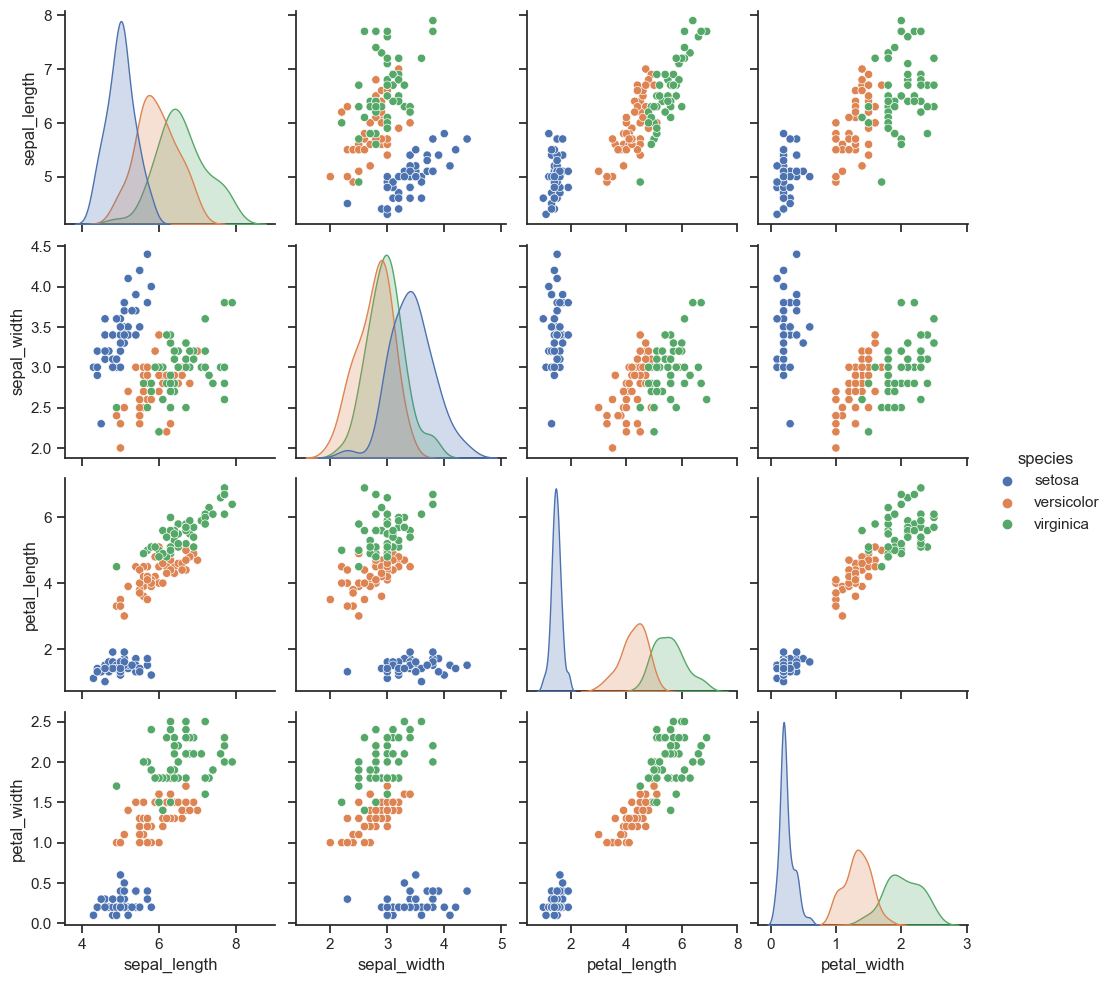

In [4]:
g = sns.pairplot(df, hue="species")

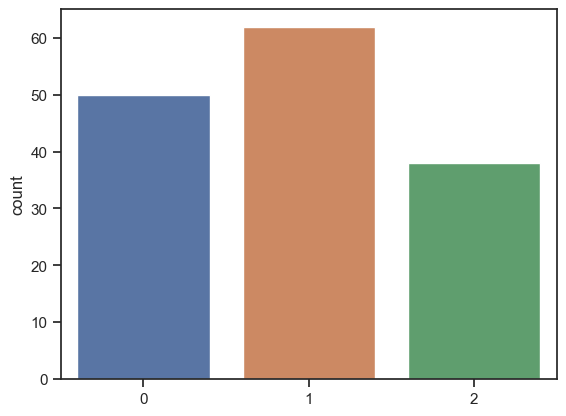

In [5]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

km = cluster.KMeans(n_clusters=3, init='random', random_state = 0)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(x=C_km)

In [6]:
# "Label" hasil clustering k-Means diatas.
C_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# <center><font color="green">Apakah perbedaan Label ini dengan hasil prediksi (klasifikasi)?</font></center>

<img alt="" src="images/clustering_vs_classification_label.png" style="height: 300px;"/>

* Sangat penting untuk dipahami dengan baik.
* Keterangan lebih detail: https://tau-data.id/evaluasi-eksternal/

# <center><font color="blue">Visualisasi Hasil Clustering?</font></center>

<img alt="" src="images/meme-cartoon/k-Means-Visualization-joke.png" style="height: 300px;"/>

* terdapat minimal 2 cara:
 - Melalui *dimensional Reduction* (DR) technique (perlu hati-hati dalam pemilihan algoritmanya).
 - Contoh DR yang cocok dan terkenal baik: t-SNE dan u-map Learn.
 - Melalui visualisasi "parsial".

# <center><font color="blue">Visualisasi Parsial via Scatter Plot</font></center>

* Memanfaatkan teknik yang sudah di bahas di data preprocessing dan visualisasi atas dataframe

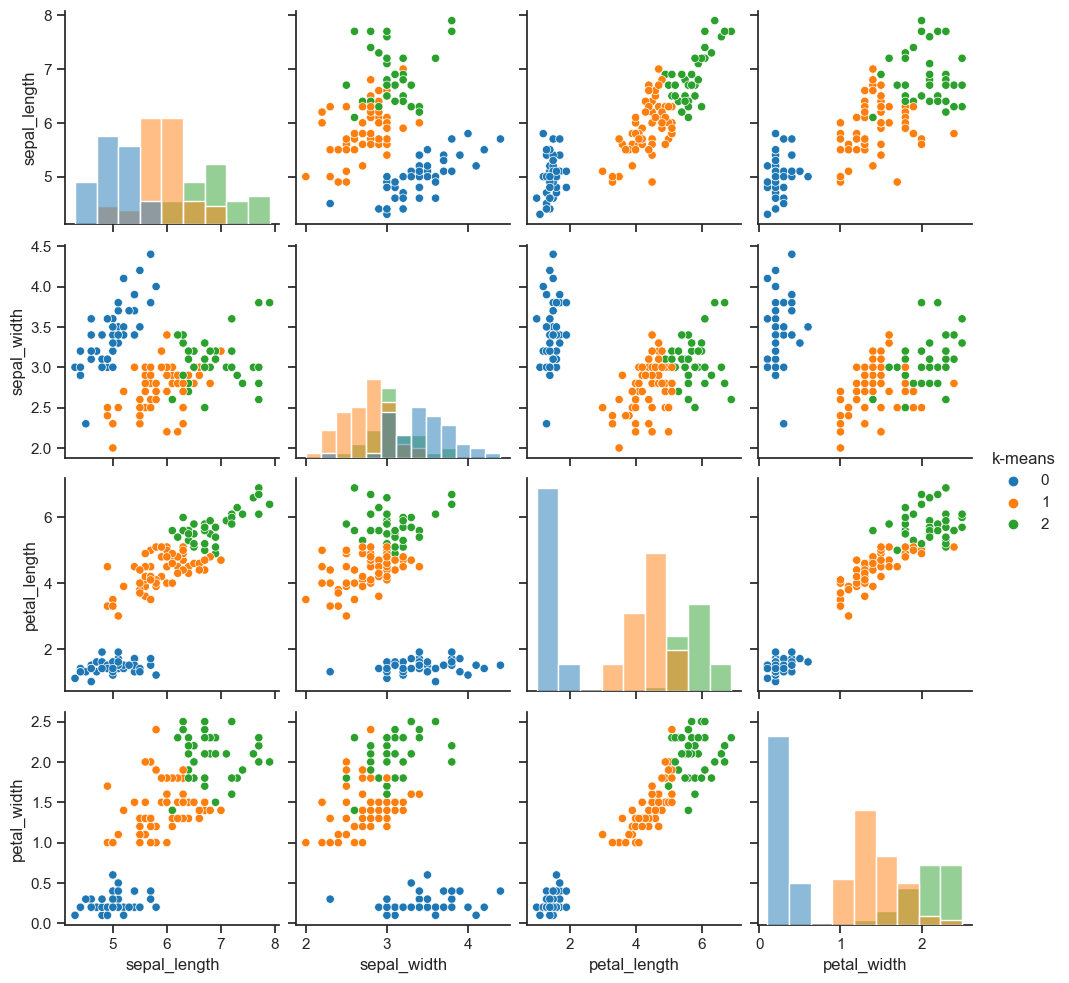

In [7]:
df['k-means'] = C_km
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','k-means']], \
                 hue="k-means", diag_kind="hist", palette="tab10")

# <center><font color="blue">Eksperimen Numerik (Studi Empiris) k-Means</font></center>

* Hapus parameter "random_state" untuk memahami efek "**randomized centroid**".
* Parameter n_jobs dapat digunakan untuk parallel processing.

<img alt="" src="images/meme-cartoon/meme cat experiment.jpg" style="height: 200px;"/>

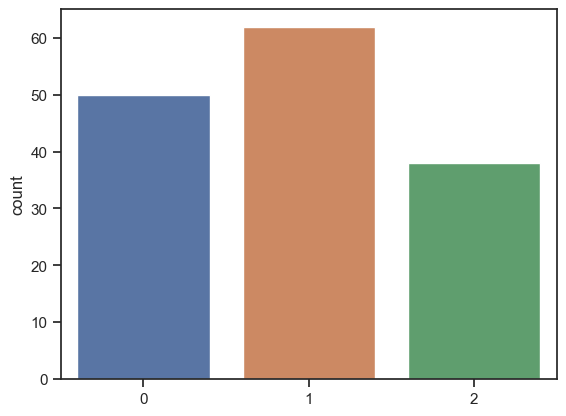

In [8]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, random_state = 0)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(x=C_km)

# <center><font color="blue">Hasil dan kesimpulan eksperimen sederhana diatas?</font></center>

* Apakah akibat dari mengacak (randomized) centroid di awal algoritma?

## <center><font color="red">k-Means sangat tidak direkomendasikan untuk diaplikasikan di aplikasi nyata (production level)</font></center>

## Mengapa?

# <center><font color="blue">Better k-Means: k-Means++</font></center>

<img alt="" src="images/km_vs_kmpp.gif" style="height: 200px;"/>

* Original <em>k-means</em> memulai algoritmanya dengan mengacak centroid awal dan k-means tidak &quot;robust&quot; terhadap centroid awal ini (apa artinya?).
* <strong>k-Means akan menghasilkan hasil yang berbeda-beda jika di-run beberapa kali!....</strong>
* k-Means++ &quot;mengatasi&quot; hal ini:
* inisialisasi centroid tidak random, tapi dengan menghitung probabilitas terbaik bagi centroid awal.
* Keuntungan selain lebih robust, biasanya iterasi yang dibutuhkan jauh lebih sedikit ketimbang k-means biasa.
* Reference :&nbsp;<a href="http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf" target="_blank">http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf</a>
* image Source: https://medium.com/@phil.busko/animation-of-k-means-clustering-31a484c30ba5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

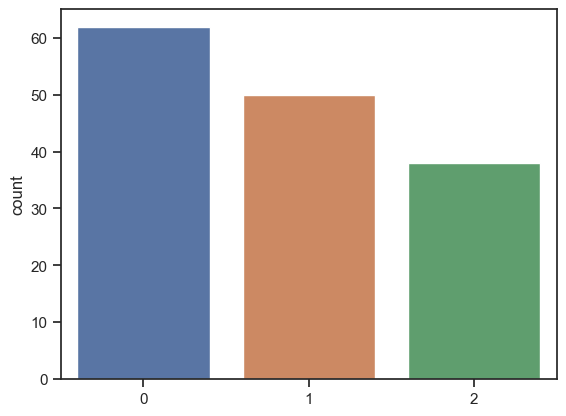

In [9]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++')
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

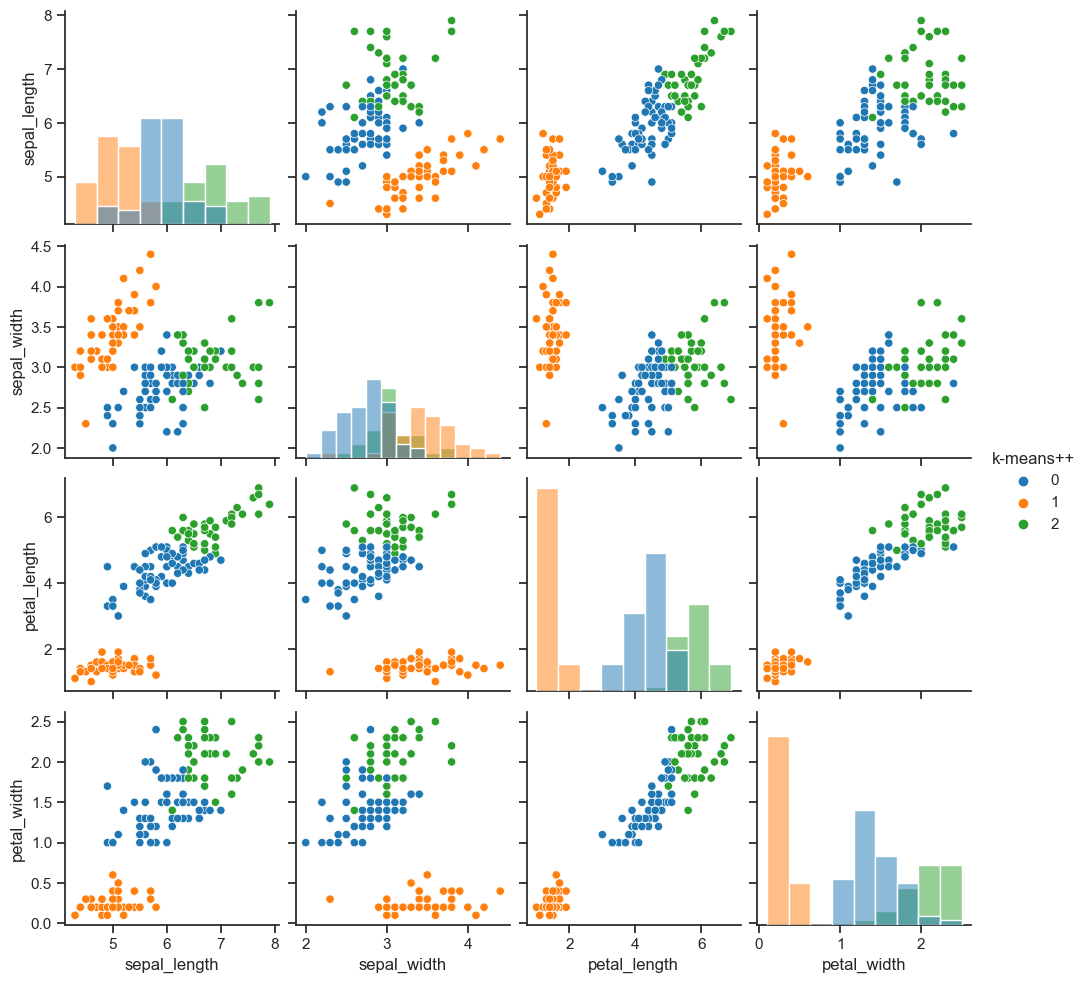

In [10]:
df['k-means++'] = C_kmpp
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

# <center><font color="blue">k-Means untuk data yang besar: Mini-Batch k-Means</font></center>

* Kompleksitas k-Means adalah $O(NkI)$ dimana $N$ jumlah data, $k$ jumlah cluster, dan $I$ jumlah iterasi.
* <strong>Referensi</strong>: *Sculley, D. (2010, April). Web-scale k-means clustering. In&nbsp;<em>Proceedings of the 19th international conference on World wide web</em>&nbsp;(pp. 1177-1178). ACM.
* Proposed by Google

<img alt="" src="images/5_minibatch.JPG" style="height: 300px;"/>

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

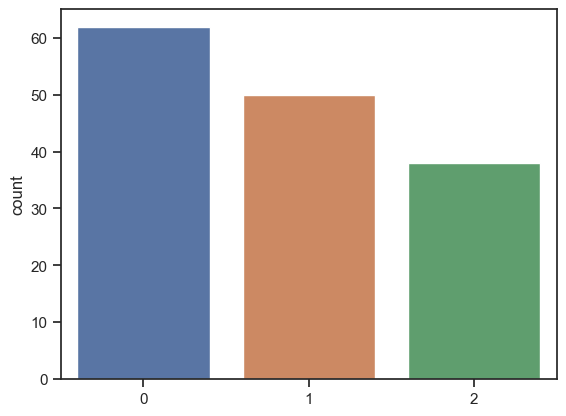

In [11]:
# MiniBatch k-Means http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', \
                               max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state) 
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(x=C_mbkm)
C_mbkm[:10]

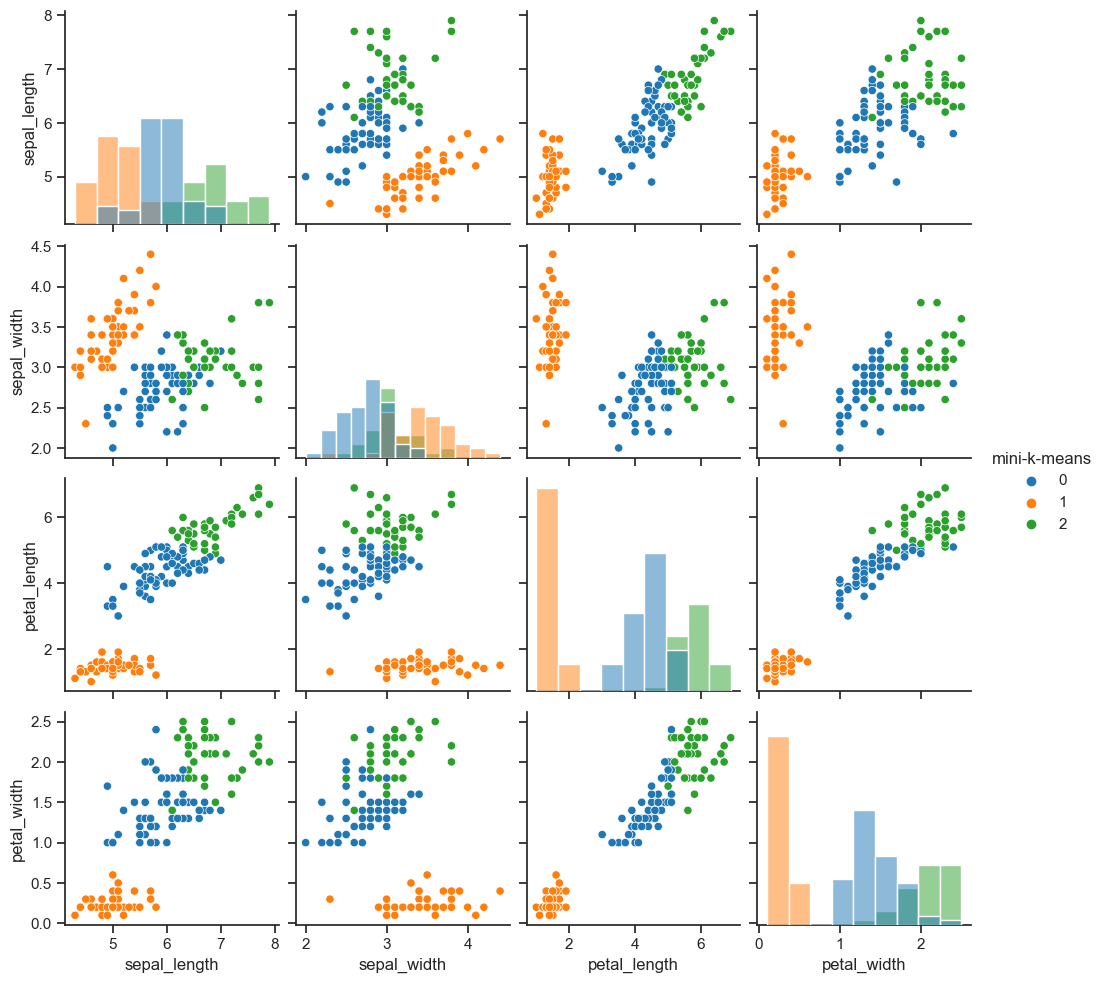

In [12]:
df['mini-k-means'] = C_mbkm
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','mini-k-means']], \
                 hue="mini-k-means", diag_kind="hist", palette="tab10")

# <center><font color="blue">k-means VS MiniBatch k-Means?</font></center>

<img alt="" src="images/kmeans_vs_mini_batch_kmeans.png" style="height: 300px;"/>

# <center><font color="blue">Catatan penting Minibatch k-Means</font></center>

* Seberapa besar/penting perbedaan hasil di mini-batch k-Means dan k-Means?
* minibatch k-Means **tidak bisa parallel**.
* parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan **minimal 3x jumlah cluster**
* Dapat dipadukan (**hybrid**) dengan k-means++

<img alt="" src="images/meme-cartoon/meme machine learning hybrid mathematics algorithm.jpeg" style="height: 300px;"/>

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

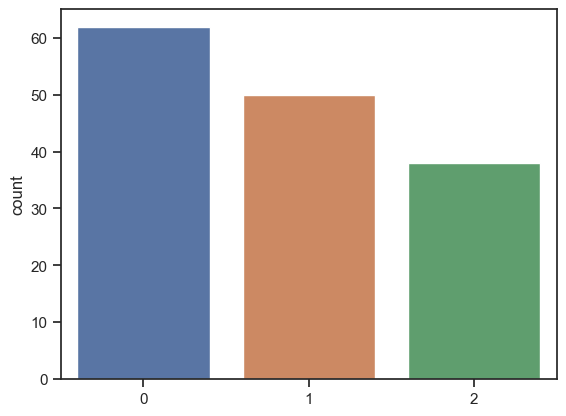

In [13]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', \
                                 max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(x=C_mbkmPP)
C_mbkmPP[:10]

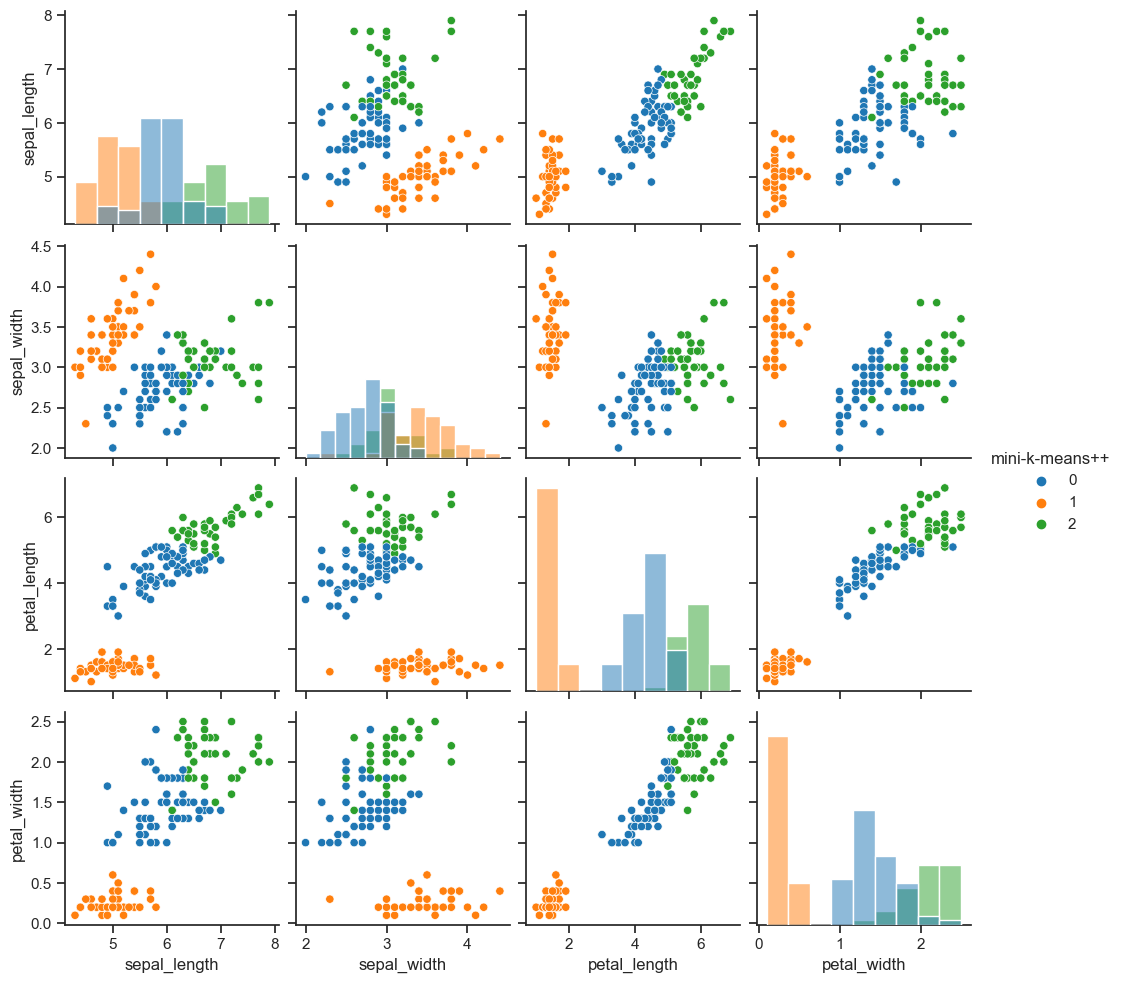

In [14]:
df['mini-k-means++'] = C_mbkmPP
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','mini-k-means++']], \
                 hue="mini-k-means++", diag_kind="hist", palette="tab10")

In [15]:
# Saving the Clustering results for future use/analysis
!mkdir data
df.to_csv("data/df_Module-05.csv", encoding='utf8', index=False)

A subdirectory or file data already exists.


# <center><font color="blue">Pentingnya memahami dengan Baik Makna Clustering</font></center>

<img alt="" src="images/5_what_is_clustering.png" style="height: 300px;"/>

* Tidak ada "Ground Truth" di Unsupervised Learning/Clustering. Sehingga tidak ada benar-salah, sehingga *tidak ada akurasi atau error*.
* Salah satu "Bias" terbesar adalah algoritma clustering yang kita pilih.
* Variabel kategorik pada algoritma k-means wajib di transformasi terlebih dahulu (misal one-hot encoding)

# <center><font color="blue">Lalu bagaimana cara mengevaluasi hasil clustering?</font></center>

* Biasa juga disebut sebagai nilai validasi.
* Selain yang diberikan di gambar, di production level ada evaluasi lain (kolom ke-4 Canvas AI)
* hati-hati dalam membandingkan algoritma clustering yang berbeda "representasi cluster".

<img alt="" src="images/tipe_evaluasi_clustering.png" style="height: 200px;"/>

# <center><font color="blue">Evaluasi internal k-Means: inertia</font></center>

* **Bukan Error!**, jangan sebut inertia sebagai **mse** atau semacamnya ... Mengapa?
* Belum ada faktor "inter distance" ==> nanti **Silhouette Score**
* image source: https://www.unioviedo.es/compnum/labs/new/kmeans.html

<img alt="" src="images/inertia_calc.png" style="height: 300px;"/>

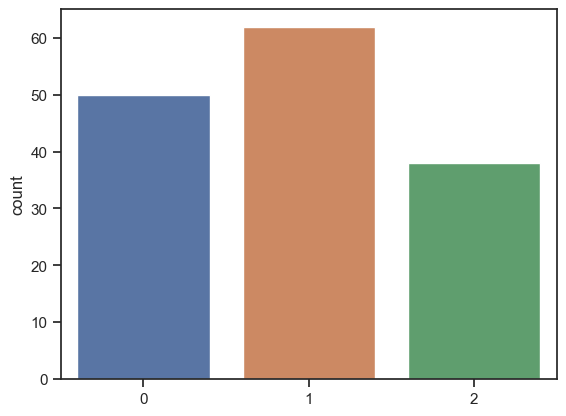

In [16]:
# Mari kita lakukan ulang clustering k-Means sebelumnya
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, random_state = 0)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(x=C_km)

In [17]:
# Perhatikan inertia menggunakan variabel "km" BUKAN C_km
km.inertia_

78.85144142614602

# <center><font color="blue">Diskusi: Makna dan Manfaat inertia di k-Means</font></center>

* Bagaimana memaknainya? 
* Apakah nilai diatas besar atau kecil?
* Tidak ada clustering yang "benar"

### <center><font color="green">Catatan Penting dalam mengevaluasi Clustering secara internal:

* Yang terpenting adalah interpretability/Informasi yang didapatkan (non-trivial information)
* Internal metric tertentu hanya cocok untuk suatu algoritma tertentu juga, sehingga di Penelitian/Aplikasi di dunia professional jangan membandingkan 2 macam clustering dengan ukuran internal yang spesifik untuk metode clustering tertentu (misal Silhouette untuk k-Means).
* Kleinberg, J. M. (2003). An impossibility theorem for clustering. In Advances in neural information processing systems (pp. 463-470).
* Referensi 1: http://papers.nips.cc/paper/2340-an-impossibility-theorem-for-clustering.pdf
* Referensi 2: https://core.ac.uk/download/pdf/34638775.pdf

# <center><font color="blue">Optimal Number of Clusters? - Elbow Method -</font></center> 

* Menggunakan inertia
* Rekomendasi ... **Bukan "wajib"** ==> Lalu apa yang lebih penting?
* Best practice? --Membandingkan dengan jumlah cluster (k) di sekitar nilai optimal--

Text(0.5, 1.0, 'Elbow curve')

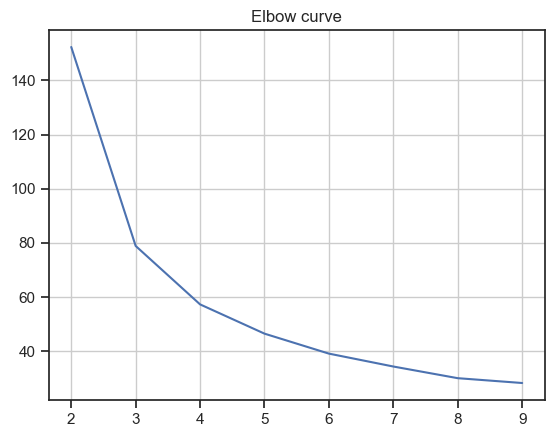

In [18]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

# <center><font color="blue">Evaluasi internal Silhouette Coefficient</font></center>

* Mengapa membutuhkan silhouette jika sudah ada inertia?
* Apa makna intuitive dari formula silhouette ini?

<img alt="" src="images/silhouette.png" style="height: 300px;"/>

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


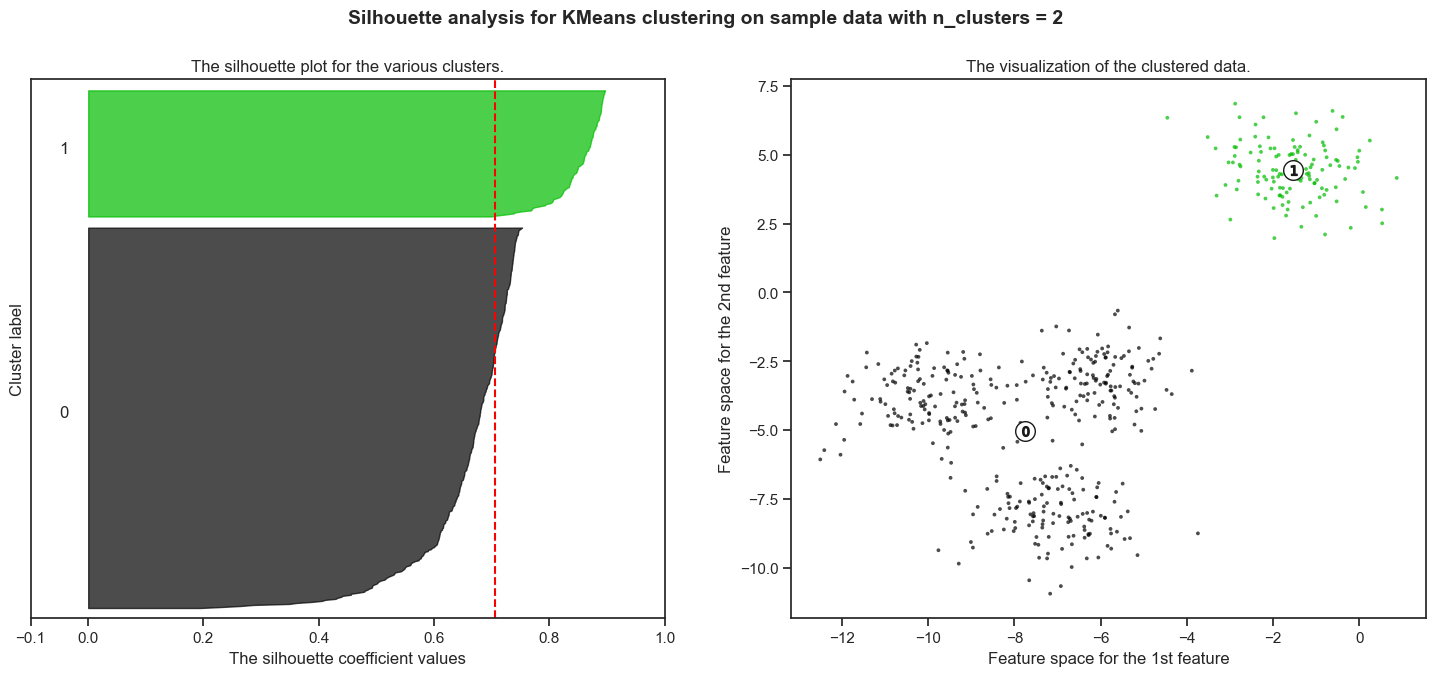

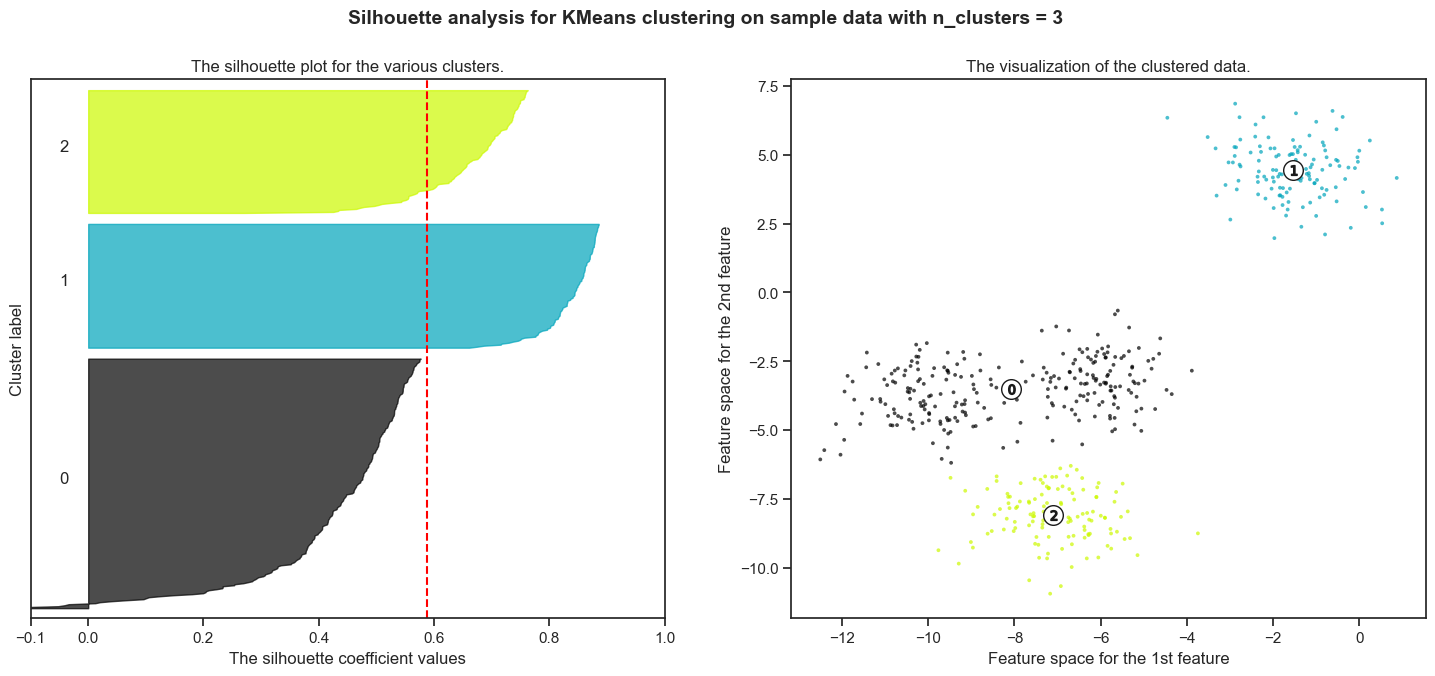

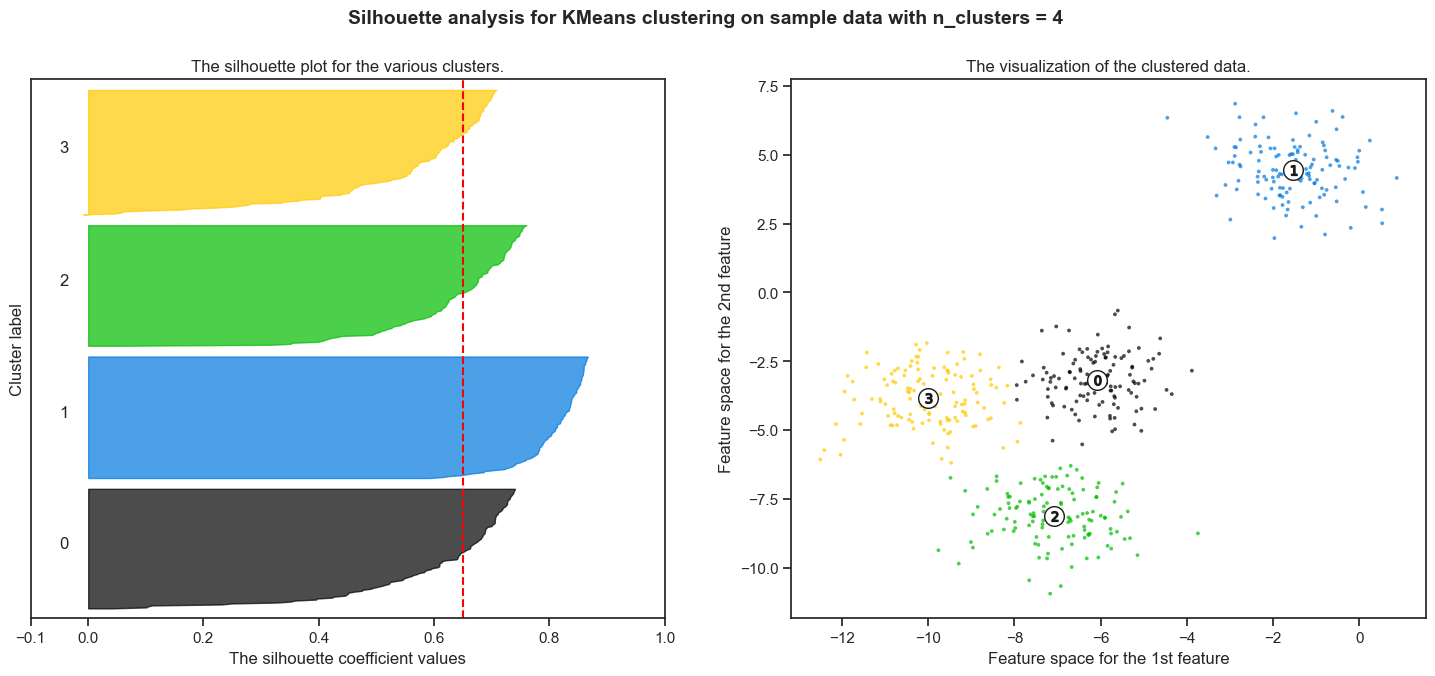

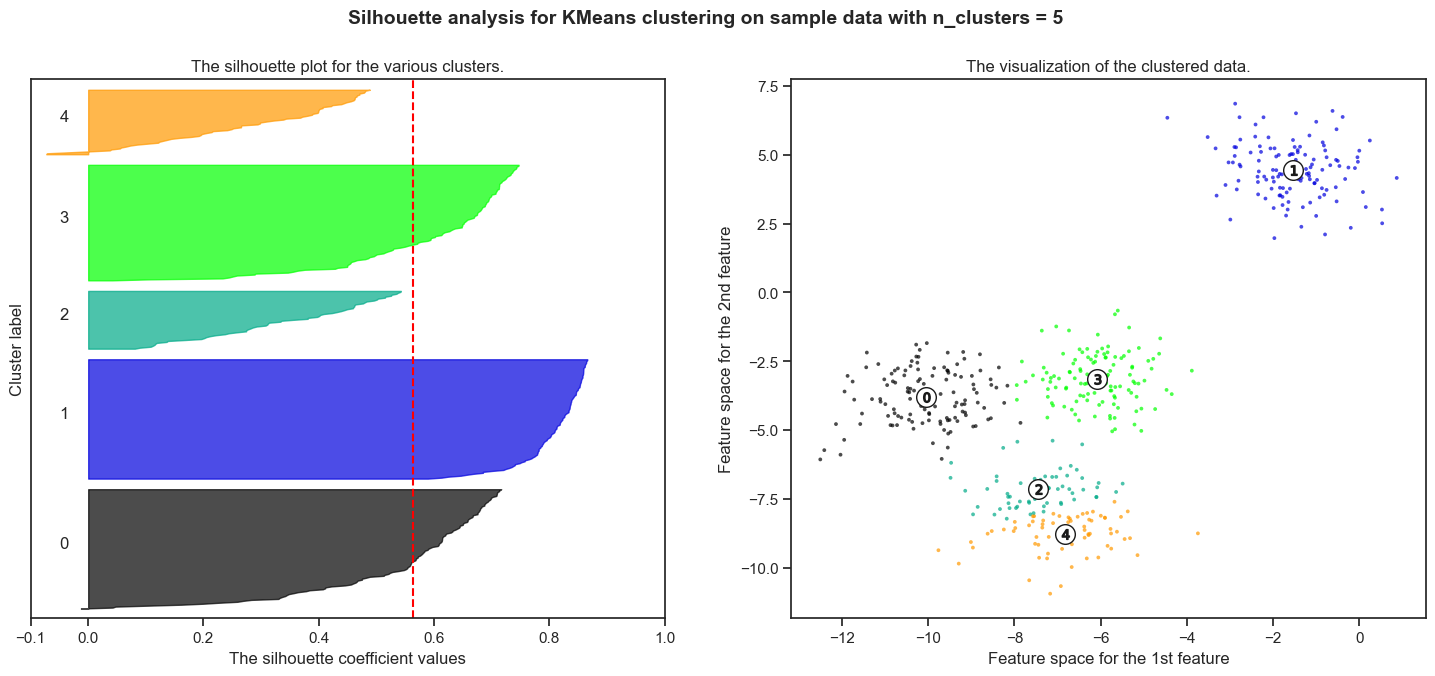

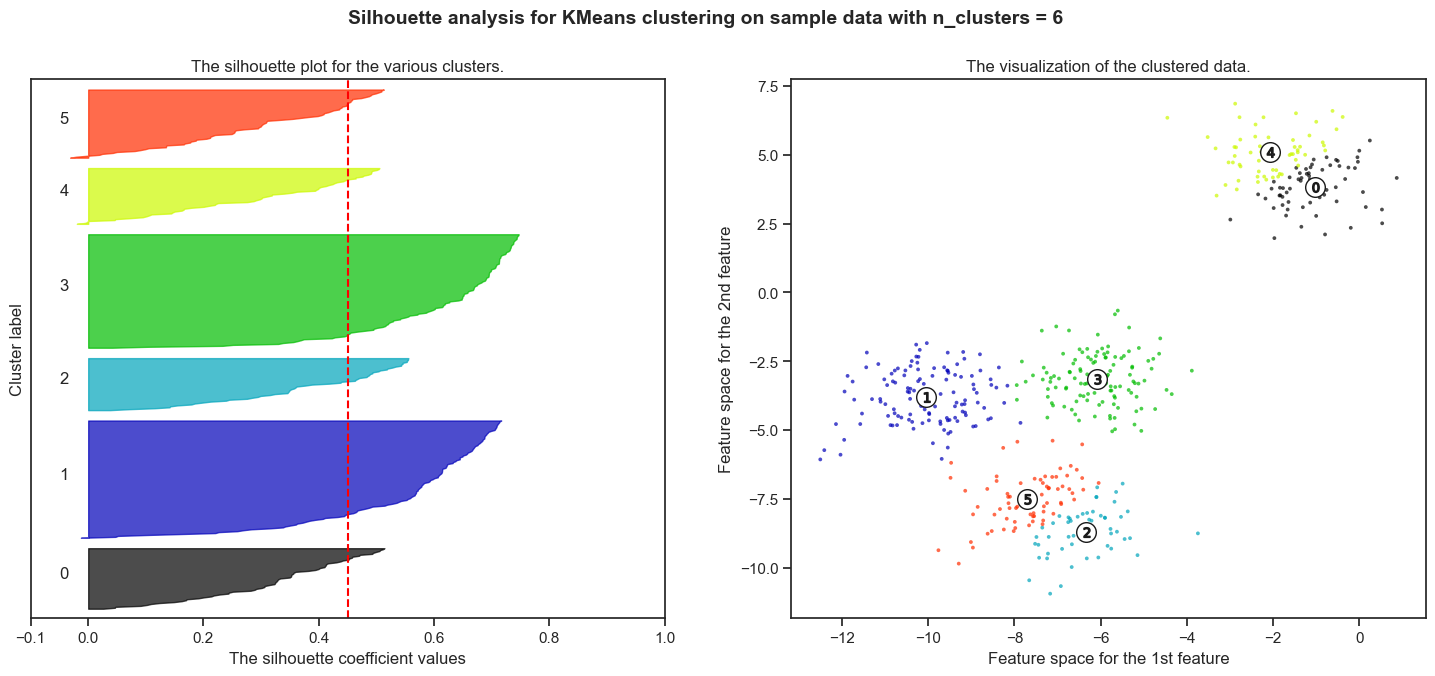

In [19]:
tau.sil_based_optimal_km()

In [20]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')

0.5528190123564101, 0.5528190123564101, 0.5528190123564101, 0.5528190123564101, 

# <center><font color="blue">Evaluasi Clustering Secara External</font></center>

* Apa yang dimaksud evaluasi eksternal clustering?
* Mengapa membutuhkan Evaluasi Eksternal
* Sebelumnya kita perlu memahami konsep "**True/False ~ Positive/Negative**"

<img alt="" src="images/meme-cartoon/confusion-matrix-meme.jpg" style="height: 400px;"/>

# <center><font color="green">Memahami Evaluasi Eksternal dengan baik</font></center>

<img alt="" src="images/clustering_vs_classification_label.png" style="height: 200px;"/>

* contoh Apa True/False ~ Positif/Negative di contoh diatas
* **True Positive (TP)**:
 - dua objek (misal d1 dan d2) berdasarkan hasil sebuah algoritma clustering berada di kelompok yang sama, dan “menurut GT” memang keduanya benarberada di kelompok yang sama. Misal di GT label d1 dan d2 = {1, 1} dan di clustering = {3, 3}.
* **True Negative (TN)**:
 - d1 dan d2 tidak dikelompokan ke dalam satu cluster, dan memang menurut GT mereka berdua ndak berjodoh. Misal di GT label d1 dan d2 = {1,2} dan di clustering = {7, 8}
* **False Positive (FP)**:
- d1 dan d2 menurut GT harusnya berada di kelompok yang berbeda, tapi karena satu dan lain hal mereka dikelompokkan ke 2 cluster yang sama oleh algoritma clusternya. Ini kayak dijodohin paksa gitu deh Gan … :v …. Misal di GT label d1 dan d2 = {1, 2} dan di hasil clustering = {5, 5}
* **False Negative (FN)**:
 - d1 dan d2 menurut GT harusnya di cluster sama, tapi dipisahkan oleh jarak dan waktu,… eh salah… maksudnya oleh hasil clusteringnya (kebalikan FP). Misal di GT label d1 dan d2 = {2, 2} dan di hasil clustering = {5, 7}.

# <center><font color="blue">NMI & $F-\beta Score$</font></center>

<img alt="" src="images/Prec-Rec-FScore-Rnd_idx.png" style="height: 200px;"/>

* Hati-hati karena perbedaan makna TP, FP, TN, & FN kelak di klasifikasi NMI dan $F-\beta Score$ akan dihitung secara berbeda (beda algoritma, namun nama metricnya sama).
* Jika dilihat sekilas, apa beda RI dan  $F-\beta Score$?
* $\beta=1$ artinya presisi sama pentingnya dengan recall.
* Apa makna presisi dan recall?

# <center><font color="blue">Presisi VS Recall</font></center>

* **Precision**: jika kita perhatikan dari rumusnya, P hanya menggunakan ukuran apakah hasil clustering/SSC-nya positive atau tidak. Maka Precision bermakna ketepatan dalam pengambilan keputusan. Misal di Information Retrieval (IR), ini bermakna berapa banyak hasil search yang tepat (relevant) yang keluar di hasil query.
* **Recall**: Kalau dilihat di rumusnya hanya ada TP dan FN lalu kalau masih ingat apa itu FN, maka tidak akan terlalu susah memaknai recall. Bayangkan FN=0 bagaimana nilai recall, lalu bayangkan FN besar bagaimana nilai recallnya? Recall dapat dimaknai sebagai "kemurnian keputusan (prediksi di klasifikasi) positif"

# <center><font color="blue">Purity in External CLustering Evaluation</font></center>

* Perlu nilai "Golden Standard" untuk pemasangan (mapping) antara label mayoritas dan gold standard-nya.
* "Analogi" (bukan error) dengan akurasi.

<img alt="" src="images/cluster_purity_external_evaluation.png" style="height: 200px;"/>

# <center><font color="blue">Berbagai Macam Evaluasi Clustering: Internal & External</font></center>

<img alt="" src="images/5_Clustering_evaluation.jpg"  style="height: 400px;"/>

* ingat di industri/dunia nyata ada tambahan evaluasi.

In [21]:
# Bagaimana dengan evaluasi External?
# "C" adalah golden standard dalam hal ini misal spesies bunga iris menurut para ahli biologi
for res in Hasil_Clustering:
    print(purity(C,res), end=', ')

0.7514854021988338, 0.7514854021988338, 0.7514854021988338, 0.7514854021988338, 

In [22]:
# Evaluasi External NMI 
for res in Hasil_Clustering:
    print(NMI(C,res), end=', ')
# untuk F-Score ada juga code dan penjelasannya di blog post di atas

0.7581756800057784, 0.7581756800057784, 0.7581756800057784, 0.7581756800057784, 

# <center><font color="blue">Cara menarik kesimpulan dari k-Means: Interpretasi & Penamaan Cluster</font></center>

<img alt="" src="images/cluster_interpretation_and_labelling.png"  style="height: 300px;"/>

* Mudahnya diartikan sebagai penamaan cluster.
* Karena k-Means menggunakan centroid sebagai representasi cluster, maka interpretasi berdasarkan nilai-nilai di seluruh centroid.

In [23]:
kmPP.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

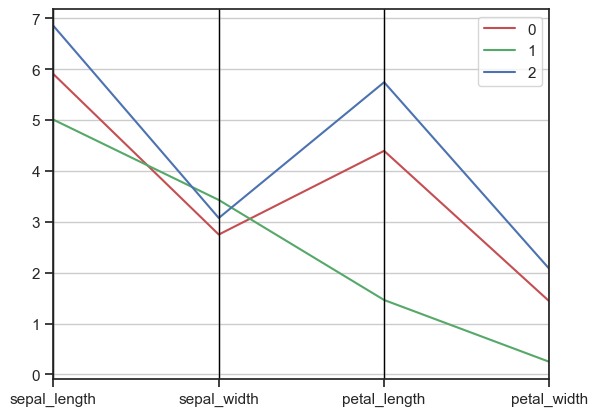

In [24]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['sepal_length','sepal_width','petal_length','petal_width']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

# <center><font color="blue"> Tips Penting Penggunaan k-Means</font></center>

* Hati-hati faktor **skala data** ==> Normalisai/Standardized. Apa pengaruhnya?
* Hati-hati asumsi **topologi data** di k-means.
* Sangat **tidak disarankan untuk data tidak terstruktur** dan berskala besar. Kalau datanya tidak besar cukup ganti jarak euclid dengan similarity Cosine.

# <center><font color="blue">Review singkat Clustering Analysis</font></center>

<img src="images/clustering_research_mindmap_taudataID.png" style="height: 400px" />

In [25]:
try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !mkdir data
    !pip install scikit-learn-extra
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [26]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance
from sklearn_extra.cluster import KMedoids
from sklearn.ensemble import IsolationForest

sns.set(style="ticks", color_codes=True)
random_state = 99

# <center><font color="blue">Load data dari module (hasil clustering) sebelumnya</font></center>

<img src="images/meme-cartoon/meme stay healthy and continue.jpg" style="height: 400px" />

In [27]:
# Loading the clustering Data from the previous module
file_ = 'data/df_Module-05.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    df = pd.read_csv(file_, low_memory = False, encoding='utf8')

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
C = df['species']#.values
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,k-means,k-means++,mini-k-means,mini-k-means++
0,5.1,3.5,1.4,0.2,setosa,0,1,1,1
1,4.9,3.0,1.4,0.2,setosa,0,1,1,1
2,4.7,3.2,1.3,0.2,setosa,0,1,1,1
3,4.6,3.1,1.5,0.2,setosa,0,1,1,1
4,5.0,3.6,1.4,0.2,setosa,0,1,1,1


# Kelemahan Kedua: Hasil yang tidak <font color="blue">Robust

## Studi Kasus <font color="blue">K-Medoid

* Pentingnya memahami "konsep" statistika/matematika dasar.

<img src='images/kmeans-vs-kmedoids.png'  style="height: 300px"/>

* Sumber Gambar: https://www.researchgate.net/figure/The-graphical-representation-of-the-difference-between-the-k-means-and-k-medoids_fig1_342871651

# Fenomena terkenal di " <font color="blue">How to Lie with Statistics "

<img src='images/mean_vs_median.png' style="height: 300px"/>

* Average menurut kamus Oxford: https://www.lexico.com/en/definition/average

## Dari Mean ke Median (Medoid)

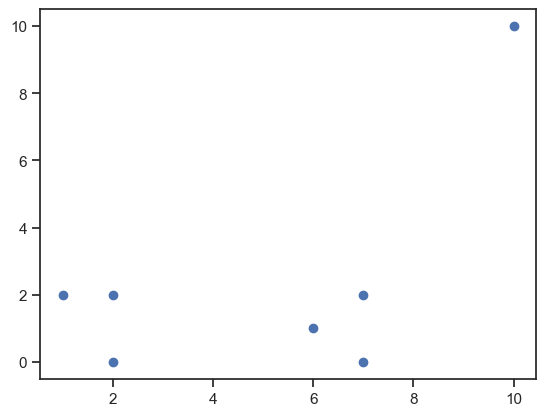

In [28]:
# Toy-data ==> ini perlu di riset
A = np.array([[2, 0], [1, 2], [2, 2], [7, 2], [6, 1], [7, 0], [10,10]])
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1])
plt.show()

In [29]:
# Solusi k-Means
km = cluster.KMeans(n_clusters=2, init='k-means++').fit(A)
C_km = km.predict(A)
centroid_km = km.cluster_centers_

# Solusi k-Medoid: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
kmedoids = KMedoids(n_clusters=2).fit(A)
C_med = kmedoids.predict(A)
centroid_med = kmedoids.cluster_centers_
"Done"

'Done'

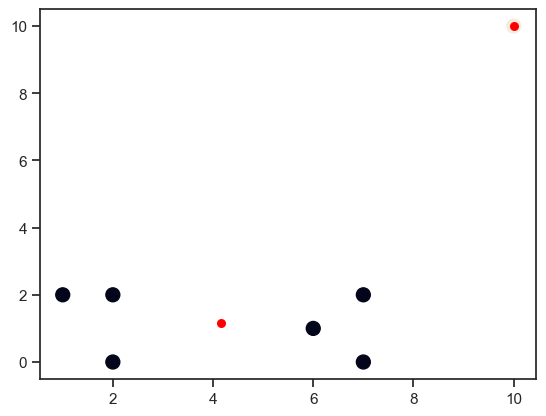

array([0, 0, 0, 0, 0, 0, 1])

In [30]:
# Plot Solusi k-Means
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], c=C_km, s=100) # s= size
ax.scatter(centroid_km[:,0], centroid_km[:,1], c="red", s=30) # Centroid k-Means "Red"
plt.show()
C_km

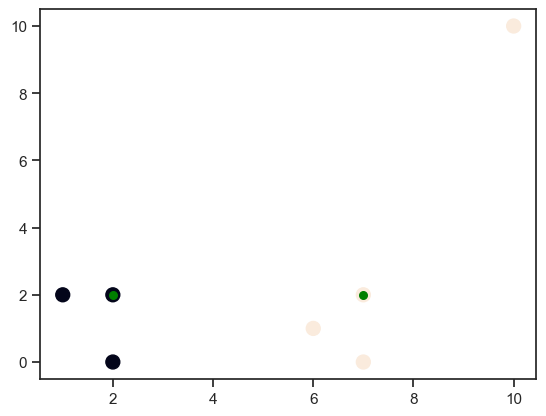

In [31]:
# Plot Solusi k-Medoid
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], c=C_med, s=100)
ax.scatter(centroid_med[:,0], centroid_med[:,1], c="green", s=30) # Centroid k-Medoid "Green"
plt.show() 
# Di Contoh ini terlihat pentingnya Outlier detection!

# <font color="blue">Diskusi</font>: Apakah berarti k-Medoid lebih baik dari k-Means?

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

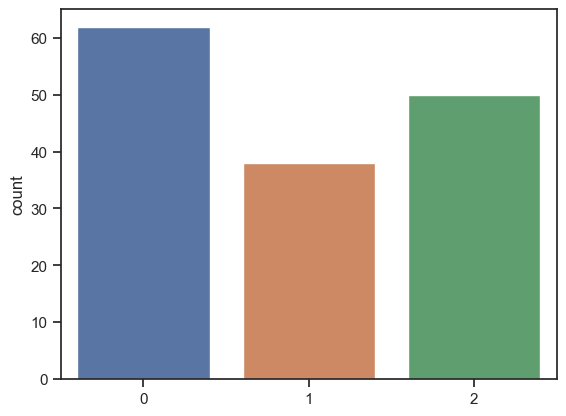

In [32]:
kmedoids = KMedoids(n_clusters=3).fit(X)
C_medoid = kmedoids.predict(X)
sns.countplot(x=C_medoid)
C_medoid[:10]

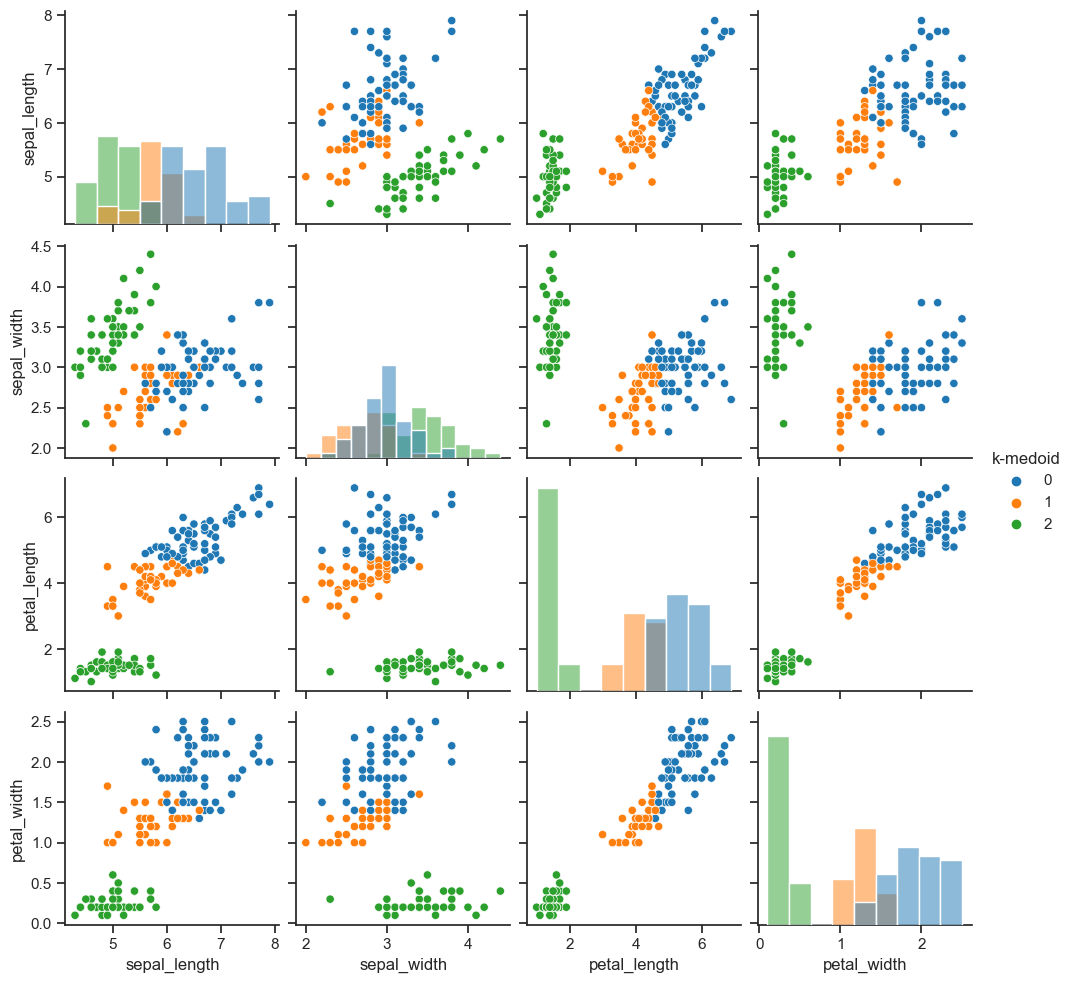

In [33]:
df['k-medoid'] = C_medoid
# Saving the Clustering results for future use/analysis
df.to_csv("data/df_Module-06.csv", encoding='utf8', index=False)
# Plot the clustering result
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','k-medoid']], \
                 hue="k-medoid", diag_kind="hist", palette="tab10")

# <center><font color="blue">Hierarchical Clustering (Agglomerative)</font></center>

<img alt="" src="images/5_hierarchical.gif" style="height: 300px"/>

* image source: https://www.kdnuggets.com/2019/09/hierarchical-clustering.html
* Clustering Optimal = Garis terpanjang https://www.sciencedirect.com/topics/computer-science/agglomerative-algorithm

# <center><font color="blue">Hierarchical Clustering Linkages</font></center>

<img alt="" src="images/5_linkages.png" style="height: 400px"/>

# <center><font color="blue">Hierarchical Clustering Applications</font></center>

<img alt="" src="images/5_Hierarchical_Text_Clustering_in_Genes_penyakit.jpg" style="height: 400px"/>

image Source: https://www.sciencedirect.com/science/article/pii/S1532046416000307

# <center><font color="blue">Hierarchical Clustering Linkages Effects</font></center>

<img alt="" src="images/hierarchical clustering linkages.png" style="height: 400px"/>

* single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
* average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
* Ward is the most effective method for noisy data.
* http://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

# <center><font color="blue">Hierarchical Clustering: Agglomerative vs Divisive</font></center>

<img alt="" src="images/hierarchical-clustering-agnes-diana.png"  style="height: 300px"/>

image source: https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/

# <center><font color="blue">Hierarchical Clustering: Pro-Contra Penggunaan</font></center>

## <font color="green">Pro</font>
* No assumption of a particular number of clusters (i.e. k-means)
* May correspond to meaningful taxonomies

## <font color="green">Cons</font>
* Once a decision is made to combine two clusters, it can’t be undone
* Too slow for large data sets, O(𝑛2 log(𝑛))

# <center><font color="blue">Evaluasi Hierarchical Clustering?</font></center>

* Silhoutte Coefficient, Dunn index, or Davies–Bouldin index
* Domain knowledge - interpretability
* External Evaluation

Read more here: https://www.ims.uni-stuttgart.de/document/team/schulte/theses/phd/algorithm.pdf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

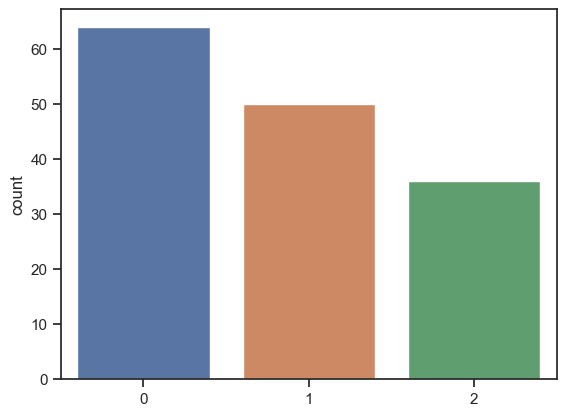

In [34]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(int)

sns.countplot(x=C_h)
C_h[:10]

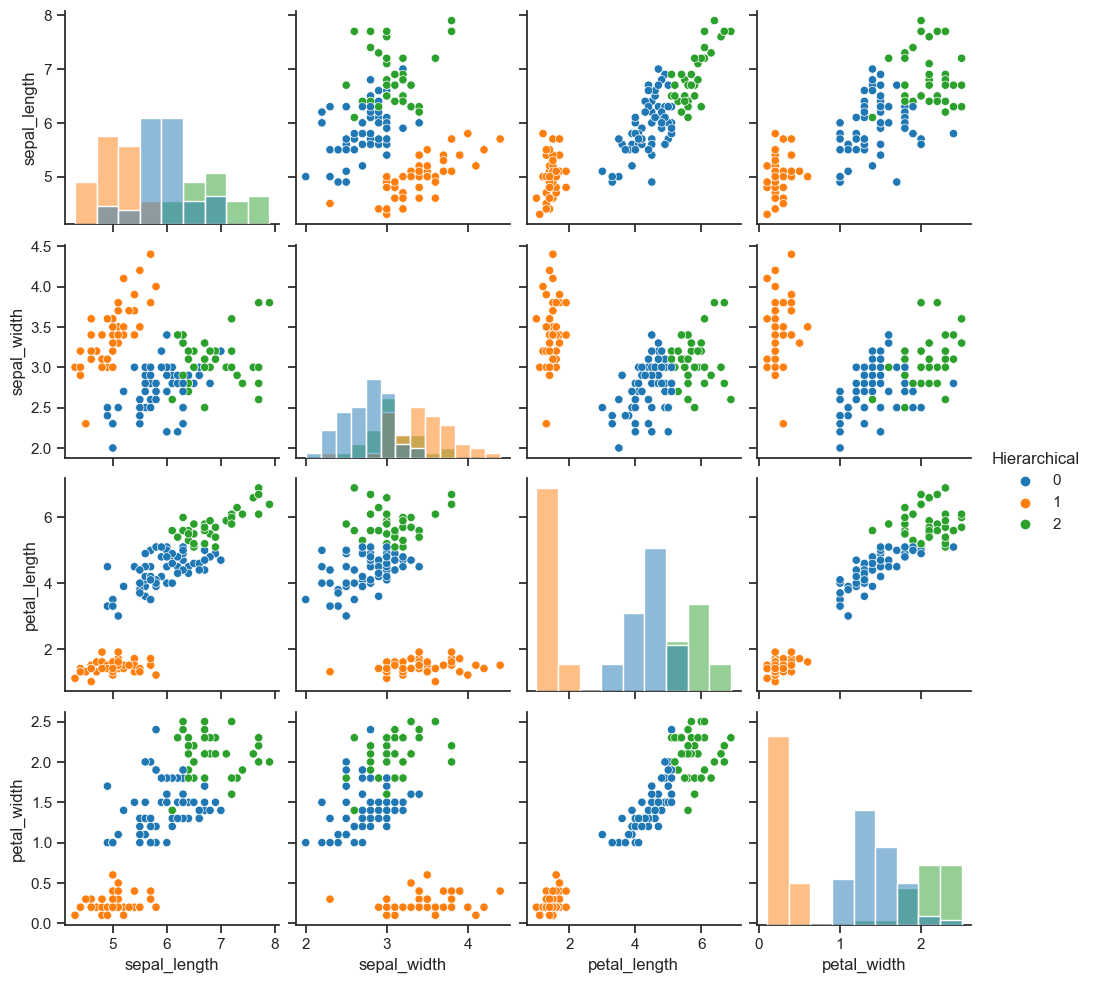

In [35]:
df['Hierarchical'] = C_h
# Saving the Clustering results for future use/analysis
df.to_csv("data/df_Module-06.csv", encoding='utf8', index=False)
# Plot the clustering result
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','Hierarchical']], \
                 hue="Hierarchical", diag_kind="hist", palette="tab10")

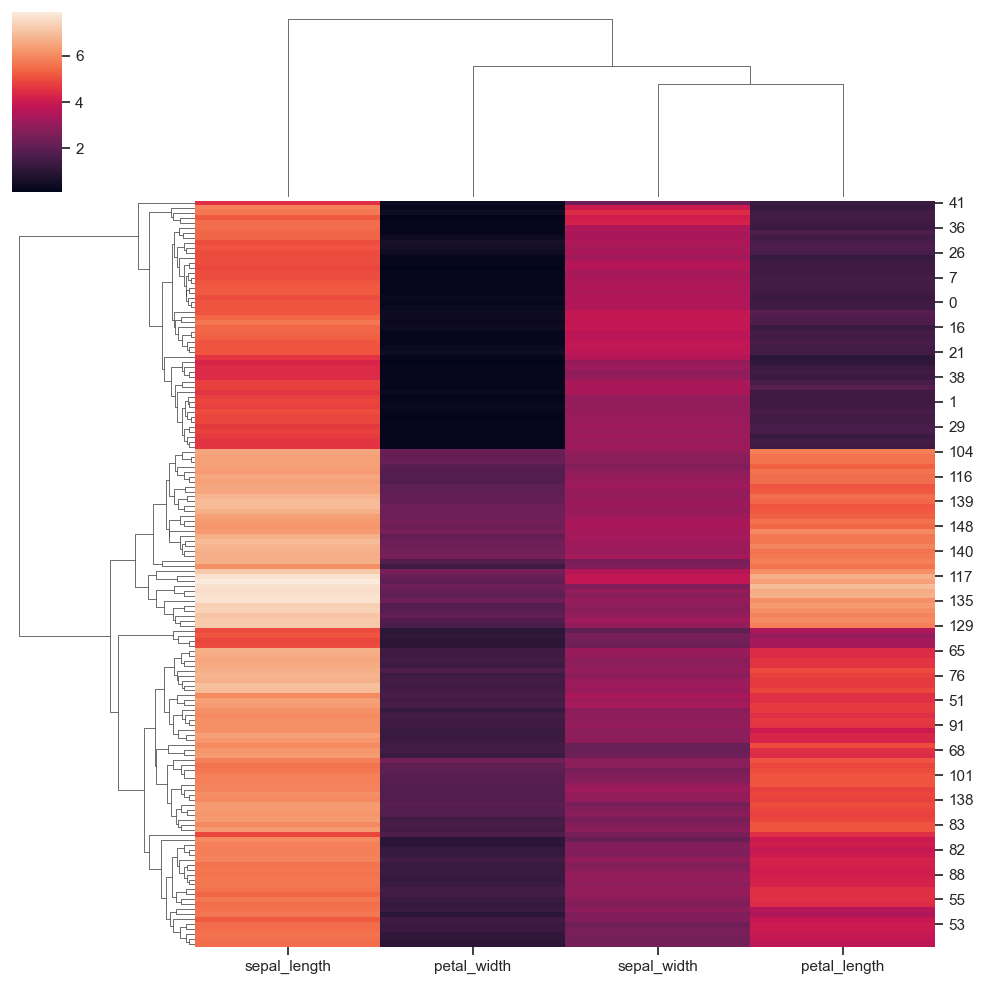

In [36]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="average", metric="euclidean")

In [37]:
# Ilustrasi Jika Data tidak terlalu banyak
N = 30 # sampel 30 record
S = X.sample(N)
Nama = ["Bunga-"+str(i) for i in range(N)]
M = scipy.spatial.distance.pdist(S, 'euclidean')
print(S.shape, M.shape)
S.head()

(30, 4) (435,)


,sepal_length,sepal_width,petal_length,petal_width
102,7.1,3.0,5.9,2.1
98,5.1,2.5,3.0,1.1
93,5.0,2.3,3.3,1.0
121,5.6,2.8,4.9,2.0
39,5.1,3.4,1.5,0.2


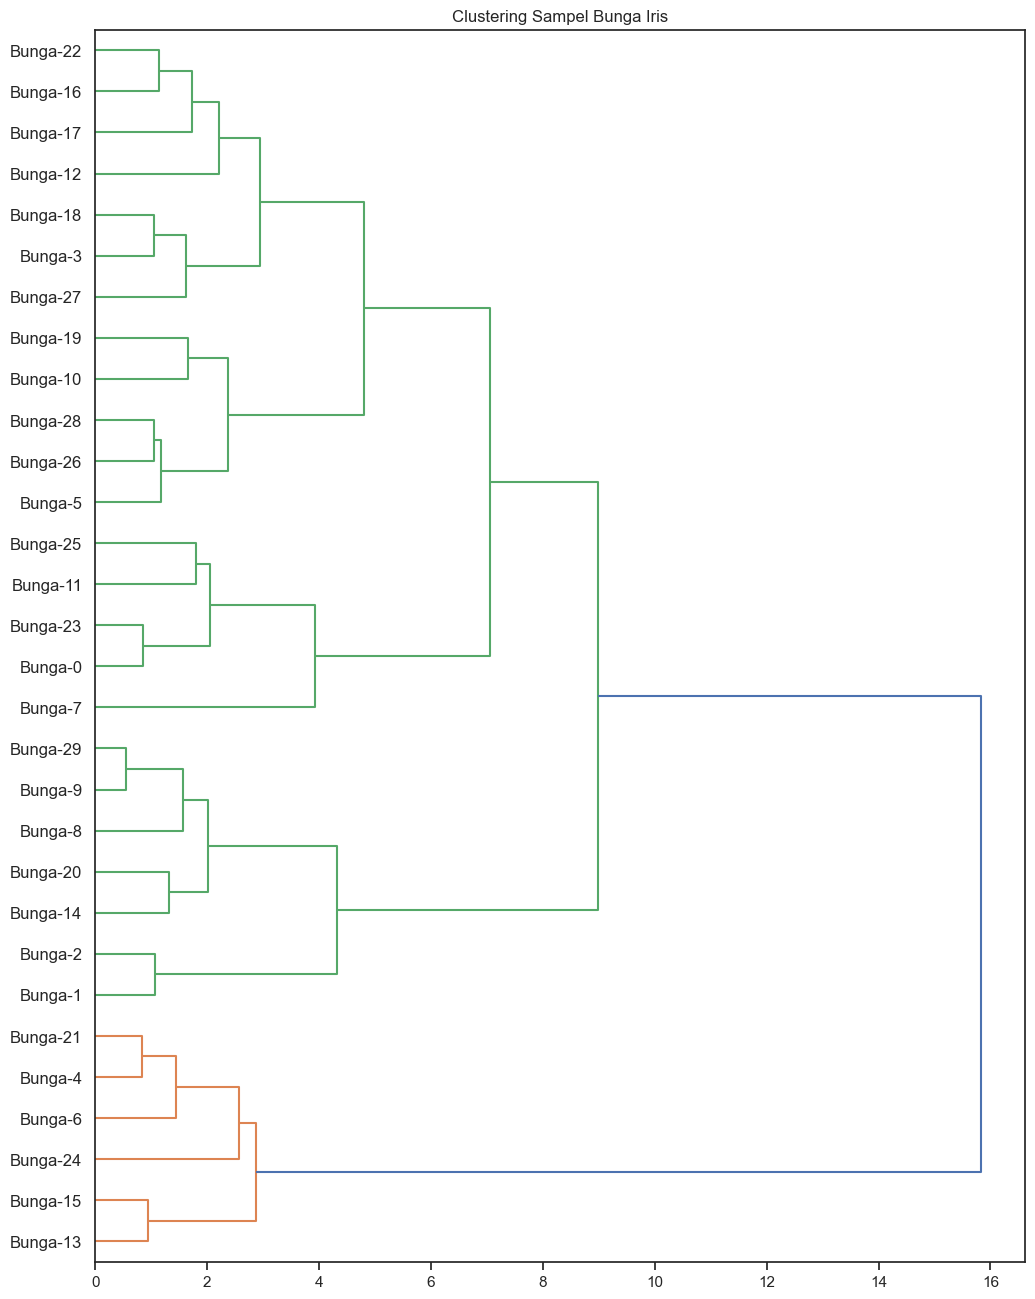

In [38]:
plt.figure(figsize=(12, 16))
dists = scipy.spatial.distance.squareform(M)
Z = linkage(dists, "average")
dendrogram(Z, labels=Nama, leaf_font_size=12, orientation='right')
plt.title("Clustering Sampel Bunga Iris")
plt.show()

# <center><font color="blue">DBSCAN for Multivariate Outlier Detection</font></center>

<img alt="" src="images/5_DBSCAN.gif"  style="height: 400px"/>

* Karena algoritma (cara kerjanya) ini maka DBSCAN sering digunakan untuk (multivariate) outlier detection.

<img alt="" src="images/IV_DBSCAN.gif"  style="height: 400px"/>

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

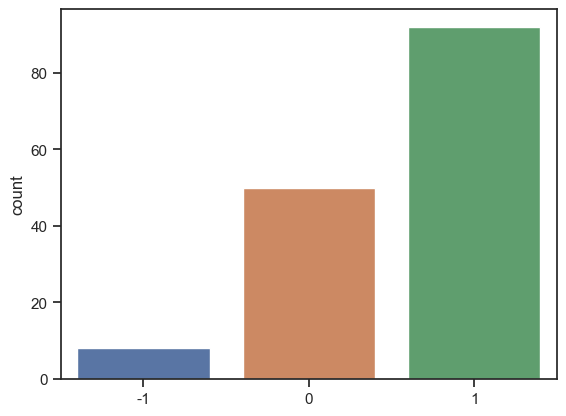

In [39]:
# DBSCAN http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# tidak membutuhkan input parameter k!!!... sangat bermanfaat untuk clustering data yang besar
dbscan = cluster.DBSCAN(eps=0.625, min_samples=5, metric='euclidean')
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
sns.countplot(x=C_db)
C_db[:10]
# apa makna cluster label -1?

In [40]:
# Banyaknya outlier terdeteksi
sum([1 for i in C_db if i==-1])

8

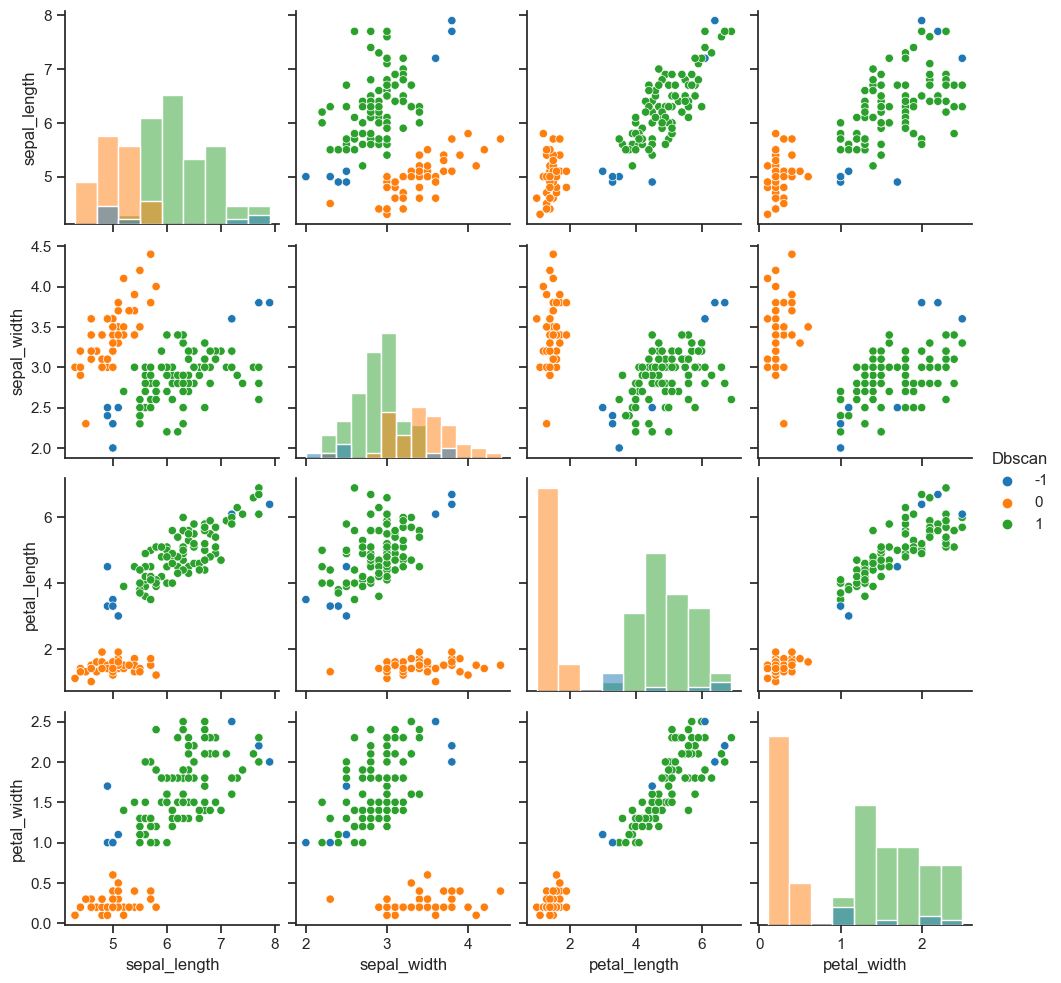

In [41]:
df['Dbscan'] = C_db
# Saving the Clustering results for future use/analysis
df.to_csv("data/df_Module-06.csv", encoding='utf8', index=False)
# Plot the clustering result
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','Dbscan']], \
                 hue="Dbscan", diag_kind="hist", palette="tab10")

# <center><font color="blue">Evaluasi DBSCAN?</font></center>

* Application-based ==> Outlier Detection
* internal validation indice called DBCV by Moulavi et al. Paper is available here: https://epubs.siam.org/doi/pdf/10.1137/1.9781611973440.96 
* Python package: https://github.com/christopherjenness/DBCV

<img alt="" src="images/dbcv.png" />

# <center><font color="blue">Review Clustering</font></center>

<img alt="" src="images/5_clustering_benchmarks.png" style="height:400px" />

# <center><font color="blue">Clustering General Guideline</font></center>

<img alt="" src="images/5_Cluster_yg_mana.png" style="height:400px; width:694px" />

# <center><font color="blue">Representasi Cluster</font></center>

<img src='images/Representasi_Cluster.PNG'  style="height: 400px"/>
* Sutanto, Taufik., & Nayak, R. (2018). Fine-grained document clustering via ranking and its application to social media analytics. Social Network Analysis and Mining, 8(1), 1-19.

# <center><font color="blue">Catatan Clustering untuk Insight di Big Data</font></center>

<img src='images/fcar.png'  style="height: 400px"/>

# <center><font color="blue"> Akhir Modul </font></center>

<hr />
<img alt="" src="images/meme-cartoon/5_saveme_clustering.jpg" style="height: 300px;"/>